In [1]:
import numpy as np
import pandas as pd                # Data exploration, manipulation functions
import matplotlib.pyplot as plt
import seaborn as sns              # Plots

In [2]:
forest_train = pd.read_csv("train.csv")

In [3]:
forest_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
covertype_train = forest_train['Cover_Type']
data_train = forest_train.drop(['Id','Cover_Type'],axis = 1)

In [4]:
forest_test = pd.read_csv("test.csv")
data_test = forest_test.drop("Id",axis = 1)

In [5]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

### Base model

In [20]:
classifier = XGBClassifier(booster = 'gbtree',learning_rate=0.5,random_state=35,n_jobs=-1,silent=False,n_estimators=1000)

In [21]:
classifier.fit(data_train,covertype_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [22]:
classifier.feature_importances_

array([  1.45679474e-01,   6.87044263e-02,   3.98620777e-02,
         7.68352598e-02,   8.03065971e-02,   1.59052253e-01,
         5.77545837e-02,   6.04570992e-02,   6.19248413e-02,
         1.54835403e-01,   4.82258946e-03,   2.56272871e-03,
         8.10754113e-03,   2.37634825e-03,   1.72401743e-03,
         3.65771260e-03,   3.19176191e-03,   4.42653103e-03,
         1.07168651e-03,   4.21685353e-03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   7.50180567e-03,
         2.84229894e-03,   1.18817412e-03,   2.30645575e-03,
         8.85306217e-04,   0.00000000e+00,   1.23476924e-03,
         3.44803487e-03,   1.16487667e-04,   7.68818602e-04,
         1.98029028e-03,   4.42653109e-04,   2.02688528e-03,
         3.30824964e-03,   2.51613348e-03,   0.00000000e+00,
         8.38711159e-04,   5.59140812e-04,   1.16487667e-04,
         3.79749783e-03,   2.84229894e-03,   3.51792737e-03,
         5.31183742e-03,   4.96237446e-03,   7.22223544e-04,
         5.35843254e-04,

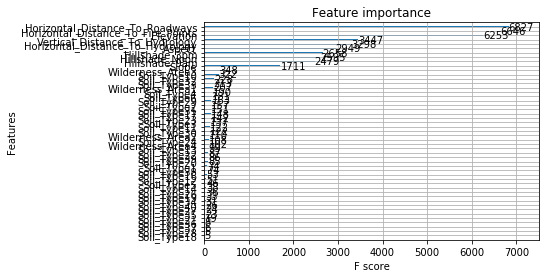

In [70]:
plt.clf()
xgb.plot_importance(classifier)
plt.show()

In [9]:
pred_test = classifier.predict(data_test)

In [53]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_XGBoost_model.csv",index = False)

### Tuning learning_rate

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
parameters = {'learning_rate':[0.1,0.3,0.5,0.7,0.9]}

In [10]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose =1)

In [11]:
grid_search.fit(data_train, covertype_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 508.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [13]:
grid_search.best_params_  #Optimal eta =0.5,n_estimators =1000

{'learning_rate': 0.5}

In [14]:
grid_search.best_score_

0.76249999999999996

In [19]:
grid_search.grid_scores_

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.75615, std: 0.01405, params: {'learning_rate': 0.1},
 mean: 0.75873, std: 0.01353, params: {'learning_rate': 0.3},
 mean: 0.76250, std: 0.01397, params: {'learning_rate': 0.5},
 mean: 0.76098, std: 0.01554, params: {'learning_rate': 0.7},
 mean: 0.76085, std: 0.01206, params: {'learning_rate': 0.9}]

### Tuning reg_lambda (L2 reg parameter)

In [23]:
parameters = {'reg_lambda':[0.5,1,1.5,2]}

In [24]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose =1)

In [25]:
grid_search.fit(data_train, covertype_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 14.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'reg_lambda': [0.5, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [26]:
grid_search.best_params_

{'reg_lambda': 1.5}

In [27]:
grid_search.cv_results_

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

{'mean_fit_time': array([ 254.79440824,  254.86013039,  246.48825296,  227.99075611]),
 'mean_score_time': array([ 4.80272508,  5.1077985 ,  4.57934896,  4.48592544]),
 'mean_test_score': array([ 0.76104497,  0.7625    ,  0.76335979,  0.76084656]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.]),
 'param_reg_lambda': masked_array(data = [0.5 1 1.5 2],
              mask = [False False False False],
        fill_value = ?),
 'params': [{'reg_lambda': 0.5},
  {'reg_lambda': 1},
  {'reg_lambda': 1.5},
  {'reg_lambda': 2}],
 'rank_test_score': array([3, 2, 1, 4]),
 'split0_test_score': array([ 0.78412698,  0.78154762,  0.7827381 ,  0.7843254 ]),
 'split0_train_score': array([ 1.,  1.,  1.,  1.]),
 'split1_test_score': array([ 0.75654762,  0.75753968,  0.75912698,  0.75436508]),
 'split1_train_score': array([ 1.,  1.,  1.,  1.]),
 'split2_test_score': array([ 0.74246032,  0.7484127 ,  0.74821429,  0.74384921]),
 'split2_train_score': array([ 1.,  1.,  1.,  1.]),
 'std_fit_time': array([ 3.

In [28]:
grid_search.grid_scores_

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.76104, std: 0.01731, params: {'reg_lambda': 0.5},
 mean: 0.76250, std: 0.01397, params: {'reg_lambda': 1},
 mean: 0.76336, std: 0.01441, params: {'reg_lambda': 1.5},
 mean: 0.76085, std: 0.01715, params: {'reg_lambda': 2}]

In [29]:
classifier = XGBClassifier(booster = 'gbtree',learning_rate=0.5,random_state=35,n_jobs=-1,silent=False,n_estimators=1000,objective="multi:softmax",reg_lambda=1.5)

In [30]:
classifier.fit(data_train,covertype_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [31]:
pred_test = classifier.predict(data_test)

In [32]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_XGBoost_model.csv",index = False)

### Tuning tree depth

In [33]:
parameters = {'max_depth':[3,5,7]}

In [34]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose =1)

In [35]:
grid_search.fit(data_train, covertype_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 11.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

In [36]:
grid_search.best_params_

{'max_depth': 7}

In [37]:
grid_search.grid_scores_

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.76336, std: 0.01441, params: {'max_depth': 3},
 mean: 0.77348, std: 0.01562, params: {'max_depth': 5},
 mean: 0.77698, std: 0.01724, params: {'max_depth': 7}]

In [38]:
pred_test = grid_search.predict(data_test)

In [39]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_XGBoost_model.csv",index = False)

In [40]:
print(classifier)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)


In [41]:
parameters = {'max_depth':[7,9,11]}

In [42]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose = 0)

In [43]:
grid_search.fit(data_train, covertype_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 18.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [7, 9, 11]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

In [44]:
grid_search.best_params_

{'max_depth': 11}

In [45]:
grid_search.grid_scores_

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.77698, std: 0.01724, params: {'max_depth': 7},
 mean: 0.78049, std: 0.01275, params: {'max_depth': 9},
 mean: 0.78069, std: 0.01329, params: {'max_depth': 11}]

In [46]:
parameters = {'max_depth':[13,17,21]}

In [47]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1,
                           verbose = 0)

In [48]:
grid_search.fit(data_train, covertype_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [13, 17, 21]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [49]:
grid_search.best_params_

{'max_depth': 13}

In [50]:
grid_search.grid_scores_

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.78254, std: 0.01374, params: {'max_depth': 13},
 mean: 0.77989, std: 0.01370, params: {'max_depth': 17},
 mean: 0.78148, std: 0.01238, params: {'max_depth': 21}]

In [52]:
pred_test = grid_search.predict(data_test)

In [55]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_XGBoost_model.csv",index = False)

In [56]:
classifier.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)>

In [57]:
classifier = XGBClassifier(booster = 'gbtree',learning_rate=0.5,n_estimators=1000,max_depth=13,reg_lambda = 1.5,random_state=35,n_jobs=-1,silent=False)

In [58]:
classifier.fit(data_train,covertype_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=13, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, num_class=7, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [59]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |      Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of boosted trees to fit.
 |  silent : boolean
 |      Whether to print messages while running boosting.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  booster: string
 |      Specify which booster to use: gbtree, gblinear or dart.
 |  nthread : int
 |      Number of parallel threads used to run xgboost.  (Deprecated, please use n_jobs)
 |  n_jobs : int
 |      Number of parallel threads used to run xgboost.  (replaces nthread)
 |  gamma : float
 |      Minimum

In [60]:
pred_test = classifier.predict(data_test)

In [61]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_XGBoost_model.csv",index = False)

### Checking col_sample by level =0.4

In [62]:
classifier = XGBClassifier(booster = 'gbtree',learning_rate=0.5,n_estimators=1000,max_depth=13,reg_lambda = 1.5,random_state=35,n_jobs=-1,silent=False,colsample_bylevel=0.4)

In [63]:
classifier.fit(data_train,covertype_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=13, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [64]:
pred_test = classifier.predict(data_test)

In [65]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_XGBoost_model.csv",index = False)

### Making estimators(trees) to 2000

In [66]:
classifier = XGBClassifier(booster = 'gbtree',learning_rate=0.5,n_estimators=2000,max_depth=13,reg_lambda = 1.5,random_state=35,n_jobs=-1,silent=False)

In [67]:
classifier.fit(data_train,covertype_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=13, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=35, reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [68]:
pred_test = classifier.predict(data_test)

In [69]:
forest_test['Cover_Type'] = pred_test
forest_test[['Id','Cover_Type']].to_csv("ForestCover_XGBoost_model.csv",index = False)

## Infrences
### Kaggle scores
#### 0.584 - default
#### 0.563 -- acc decareases after decreasing eta and keeping n_estimators same
#### 0.416 -- acc decreases after decresaing eta from 0.1 to 0.001 and incrasing trees to 500 from 100
#### 0.7269 ----- Huge Jump in accuracy after increasing eta from 0.1 to 0.5 with 500 trees
#### 0.69  -- after reducing trees to 100 from 500, accuracy reduced by 3%
#### 0.732 --- small increase in accuracy after increasig trees from 500 to 1000
#### 0.7330 ------vry small inc afer reg_lambda made from 1 to 1.5
#### 0.7641  --- kaggle score improved after increasing max_depth from 3 to 13 (optimum value found using GRid search) - Optimal model without feature engineering
#### 0.7615  --- slight decrease after making colsample_bylevel to 0.4 from 1
#### 0.7623 -- no improvement after increaseing trees from 1000 to 2000


### Further feature engineering options - drop columns with very little variance, those with low importance scores and combine corelated features
